In [1]:
#importing necessary libraries

from google_play_scraper import app
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
result = app(
    'com.jar.app',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.jar.app',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    count=10000, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

In [4]:
result

[{'reviewId': 'gp:AOqpTOEuv7ed_FtZLad0oknii1-vJnJ145gS1uOjcogBesIhVH21YAVKZZfOVastHx_4K4c1napf25kR9cIKi4E',
  'userName': 'Rajani B',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GjvgtYMlZGNGOUjJOdRV9CmZ7oWR8ibls4qUJ8D5A',
  'content': "It's a SCAM. I initially liked this app and everything was working fine. Just to try the authenticity of the app had ordered 1grm gold coin and for my surprise it was delivered in just 2 days and the quality was good too. Was impressed. The moment ordered for huge amount the delivery is taking long time and I have no way to track. Customer service is pathetic and no response at all on whatsapp. I want to cancel the order. But no option. Its a TRAP.",
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '4.2.5',
  'at': datetime.datetime(2022, 2, 25, 8, 19, 46),
  'replyContent': 'Hi, we regret the inconvenience caused. Kindly elaborate on the issue so that we can look into the matter and resolve it for you. Please write to us a

In [5]:
df = pd.DataFrame(result)

In [6]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOEuv7ed_FtZLad0oknii1-vJnJ145gS1uOjcog...,Rajani B,https://play-lh.googleusercontent.com/a-/AOh14...,It's a SCAM. I initially liked this app and ev...,1,0,4.2.5,2022-02-25 08:19:46,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:55:25
1,gp:AOqpTOEblNaswv-lhnpqIsvP0LpPAdpA_9ySMDLKBc7...,Rushikesh Kulkarni,https://play-lh.googleusercontent.com/a-/AOh14...,App is good. Concept is good. But customer ser...,2,0,4.2.5,2022-02-24 18:19:19,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:02
2,gp:AOqpTOGUSzKGWAFdwbekHYUas0MGg6q8_eoyOssRJx4...,Jaskirat Singh,https://play-lh.googleusercontent.com/a-/AOh14...,This application is wonderful. It's very much ...,5,0,4.2.5,2022-02-24 19:34:03,Thanks for the 5-star rating. Hope you continu...,2022-02-26 09:39:48
3,gp:AOqpTOFosdTHFxuQzVrwK4vG1B1AuIos0_aONqCD_U_...,Md Arbaz,https://play-lh.googleusercontent.com/a/AATXAJ...,"Hello, I opted for 2g of gold delivery to my a...",4,0,4.2.5,2022-02-26 10:56:25,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:54:54
4,gp:AOqpTOHsV8zOXdJvMubi2hIQew1jSyu65eYPRRPW5sB...,Talha Wasim,https://play-lh.googleusercontent.com/a-/AOh14...,It doesn't fetch round off amount from SMS or ...,1,0,4.2.5,2022-02-24 14:59:41,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:13


In [99]:
df['date'] = df['at'].map(lambda x: x.date())

df["date"]= pd.to_datetime(df['date'])

In [102]:
date_group = df.groupby('date')

In [119]:
#checking the date range of the dataset

print('oldest date : ' +  str (min(df["date"])))
print('latest date : ' +  str (max(df["date"])))
print('time period : ' + str(max(df["date"])-min(df["date"])))

oldest date : 2021-04-22 00:00:00
latest date : 2022-02-26 00:00:00
time period : 310 days 00:00:00


In [104]:
review_by_date = pd.DataFrame(date_group.size(), columns=['count_review_posted'])
print(review_by_date)

            count_review_posted
date                           
2021-04-22                    4
2021-04-23                    2
2021-04-24                    6
2021-04-25                    2
2021-04-26                    2
...                         ...
2022-02-22                   97
2022-02-23                  190
2022-02-24                  264
2022-02-25                   96
2022-02-26                   98

[286 rows x 1 columns]


In [112]:
#average daily reviews posted

mean_review_post = review_by_date['count_review_posted'].mean()
mean_review_post.round(decimals=0)

35.0

In [7]:
newdf = df

In [120]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   content         10000 non-null  object        
 1   score           10000 non-null  int64         
 2   thumbsUpCount   10000 non-null  int64         
 3   at              10000 non-null  datetime64[ns]
 4   replyContent    9958 non-null   object        
 5   repliedAt       9958 non-null   datetime64[ns]
 6   Num_words_text  10000 non-null  int64         
 7   user_exp        10000 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(3), object(2)
memory usage: 556.9+ KB


In [122]:
#newdf.to_excel("~/Desktop/jar_data.xlsx")

In [9]:
#checking for any null values 
newdf.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1059
at                         0
replyContent              42
repliedAt                 42
dtype: int64

In [10]:
newdf.shape

(10000, 10)

In [11]:
newdf = newdf.drop(['reviewId','userName','userImage','reviewCreatedVersion'], axis = 1)

In [12]:
newdf.describe()

,score,thumbsUpCount
count,10000.000000,10000.000000
mean,4.139000,2.237700
std,1.548392,21.463095
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,912.000000


In [20]:
print("No. of 5 star reviews : " + str (len(newdf.groupby('score').get_group(5))))
print("No. of 4 star reviews : " + str (len(newdf.groupby('score').get_group(4))))
print("No. of 3 star reviews : " + str (len(newdf.groupby('score').get_group(3))))
print("No. of 2 star reviews : " + str (len(newdf.groupby('score').get_group(2))))
print("No. of 1 star reviews : " + str (len(newdf.groupby('score').get_group(1))))

No. of 5 star reviews : 7291
No. of 4 star reviews : 526
No. of 3 star reviews : 234
No. of 2 star reviews : 180
No. of 1 star reviews : 1769


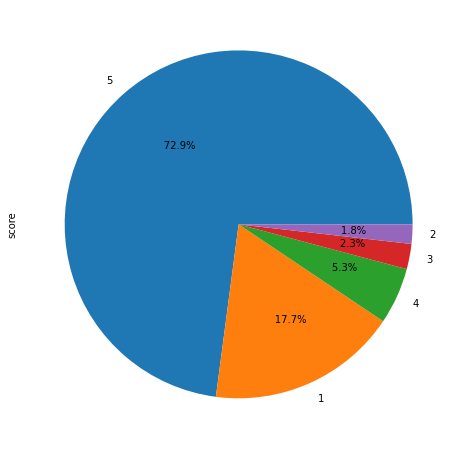

In [21]:
newdf['score'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%10.1f%%')
plt.show()

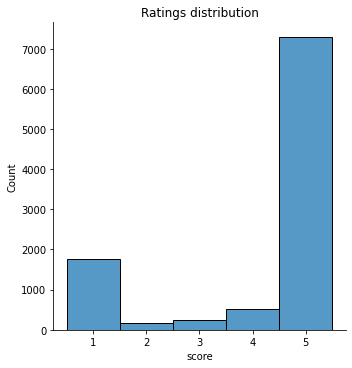

In [13]:
#histogram to plot ratings 

sns.displot(newdf['score'],discrete=True).set(title='Ratings distribution')
plt.show()

In [14]:
#count the length of each review

newdf['Num_words_text'] = newdf['content'].apply(lambda x:len(str(x).split())) 

In [16]:
newdf.head(5)

,content,score,thumbsUpCount,at,replyContent,repliedAt,Num_words_text
0,It's a SCAM. I initially liked this app and ev...,1,0,2022-02-25 08:19:46,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:55:25,87
1,App is good. Concept is good. But customer ser...,2,0,2022-02-24 18:19:19,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:02,61
2,This application is wonderful. It's very much ...,5,0,2022-02-24 19:34:03,Thanks for the 5-star rating. Hope you continu...,2022-02-26 09:39:48,42
3,"Hello, I opted for 2g of gold delivery to my a...",4,0,2022-02-26 10:56:25,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:54:54,81
4,It doesn't fetch round off amount from SMS or ...,1,0,2022-02-24 14:59:41,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:13,40


In [63]:
len(newdf['replyContent'])

10000

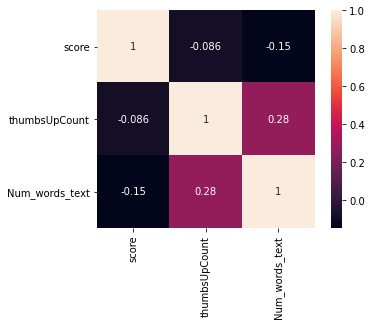

In [23]:
#correlation plot to check for relationship

corr = newdf.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [24]:
newdf.groupby('score')['Num_words_text'].mean() 

score
1    20.124929
2    26.088889
3    16.111111
4    10.241445
5    14.981210
Name: Num_words_text, dtype: float64

## Segmenting the ratings into 3 categories based on their ratings: 
- Users with 4+ ratings : Great
- Users with 3 ratings : Can be Improved
- Users with 2 and below ratings : Bad

In [25]:
bins = [0,2,3,5]
labels = ['bad','can be improved','great']

newdf['user_exp'] = pd.cut(newdf['score'],bins,labels=labels)

In [26]:
newdf.head(5)

,content,score,thumbsUpCount,at,replyContent,repliedAt,Num_words_text,user_exp
0,It's a SCAM. I initially liked this app and ev...,1,0,2022-02-25 08:19:46,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:55:25,87,bad
1,App is good. Concept is good. But customer ser...,2,0,2022-02-24 18:19:19,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:02,61,bad
2,This application is wonderful. It's very much ...,5,0,2022-02-24 19:34:03,Thanks for the 5-star rating. Hope you continu...,2022-02-26 09:39:48,42,great
3,"Hello, I opted for 2g of gold delivery to my a...",4,0,2022-02-26 10:56:25,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:54:54,81,great
4,It doesn't fetch round off amount from SMS or ...,1,0,2022-02-24 14:59:41,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 11:03:13,40,bad


In [31]:
#user experience by count

user_exp_count = newdf['user_exp'].value_counts()
user_exp_count 

great              7817
bad                1949
can be improved     234
Name: user_exp, dtype: int64

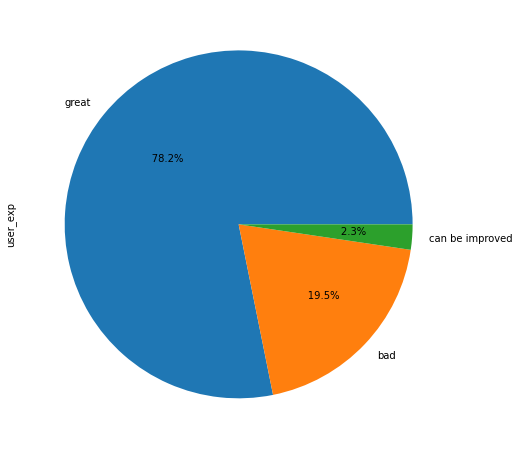

In [30]:
newdf['user_exp'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%10.1f%%')
plt.show()

In [32]:
exp_group = newdf.groupby('user_exp')

In [33]:
exp_group.first()

,content,score,thumbsUpCount,at,replyContent,repliedAt,Num_words_text
user_exp,,,,,,,
bad,It's a SCAM. I initially liked this app and ev...,1,0,2022-02-25 08:19:46,"Hi, we regret the inconvenience caused. Kindly...",2022-02-26 10:55:25,87
can be improved,It was reading the messages and rounding the m...,3,0,2022-02-17 21:45:50,"Hi, we regret the inconvenience caused. Kindly...",2022-02-17 22:40:32,43
great,This application is wonderful. It's very much ...,5,0,2022-02-24 19:34:03,Thanks for the 5-star rating. Hope you continu...,2022-02-26 09:39:48,42


In [24]:
# z = bad_exp.loc[bad_exp['content'].str.contains("login", case=False)]
# i=1
# for line in z['content'] :
#     print ("Comment "+ str(i))
#     print(line)
#     print("-" * 10)
#     i = i +1

Comment 1
Worst App Login problem as well as amount debited from bank account around Rs 400/- via autodebit facility but amount not reflected in Jar App neither it is not showing the balance in wallet
----------
Comment 2
Adding to the previous review. These guys have simply stopped responding. No resolution. Still waiting for an answer since the last 20 days. When I am unable to login, why can't you guys just close the account and refund the money ? Horrible experience. Disappointing customer service. Registered a few days ago and started using and now unable to login. App doesnt read the OTP or even let us enter manually. Customer service Non responsive on emails and what's app too.
----------
Comment 3
Fake and poor app. So many time you will face login error even payment fail and UI look like some kiddos made it. So many functions under development from last 3 to 4 months. To be honest in this time we can development similar kind of apps with full functionality. I think they just m

In [37]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Generating word cloud for 1 and 2 star ratings - bad reviews

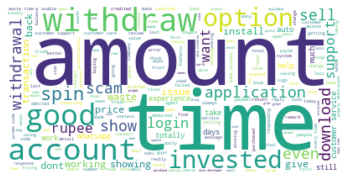

In [140]:
from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['app','savings','gold','investment','digital','money','will','please','worst','fraud','fake','invest'])

# Generate a word cloud image
text = " ".join(review for review in bad_exp['content'])
wordcloud = WordCloud(stopwords=stopwords, min_word_length = 4, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Generating word cloud for 3 star ratings - can be improved reviews

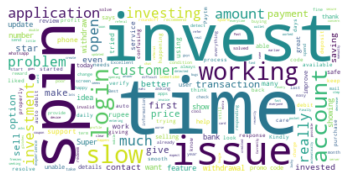

In [178]:


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['nice','good','please','gold','money','concept','need','will'])


# Generate a word cloud image
text = " ".join(review for review in okay_exp['content'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", min_word_length = 4).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Displaying upvoted issues in bad category

In [155]:
bad_exp = exp_group.get_group('bad')
sort_bad_exp = bad_exp.sort_values(by='thumbsUpCount',ascending=False)
file_sorted_bad_exp = sort_bad_exp[['content','thumbsUpCount']]
for row in file_sorted_bad_exp['content'] :
    print ("Comment "+ str(i))
    print(row)
    print("-" * 10)
    i = i +1

Comment 138
*WITHDRAWAL ISSUE*It's a cool app that boosts your savings while you spend. I am using it over a long time. I am specifically disappointed when I couldn't withdraw in a hassle-free manner. And cherry on the cake is jar app doesn't have any customer service no. Just a AI watsaap chat. It makes no sense of saving money if it's not with you wen needed and neither you are able to connect with the company.
----------
Comment 139
The app is painfully slow. Half of the time page does not load properly. Animations are not smooth with lots of lags. None of the apps in my phone behave like this. Sometimes it is very frustrating. Developers should work on the UX of this app at the top priority otherwise it will drive the users away.
----------
Comment 140
Spin always stop at 1rupees. Fixed to 1?First time I got one more spin, free spin must be increased. Why are you taking charges for buying gold, there is a huge difference between the buying Price and the money shown, please don't do

Comment 741
Every time otp said wrong. Otp is right but said wrong otp.
----------
Comment 742
Nice investment app
----------
Comment 743
This is fake game Totally west money Don't try it game plsss
----------
Comment 744
Worst app ever
----------
Comment 745
Worst app ever
----------
Comment 746
Why to take amount in my account What can i do for you
----------
Comment 747
don't waste ur time and money :(
----------
Comment 748
Requestly DONT TRY THIS APP
----------
Comment 749
Worst app wast of money
----------
Comment 750
Not a scure app
----------
Comment 751
Net work poor very
----------
Comment 752
This app is fake I lost my money who I invest is app
----------
Comment 753
don't waste your time
----------
Comment 754
Fround app I am not able to withdraw my money
----------
Comment 755
This Nabab movie of Indian
----------
Comment 756
Fully Worst app
----------
Comment 757
i can not claim the prize recieved from jio why
----------
Comment 758
I get a coupan by jio To buy 50 rs gold

Comment 1187
There is no paytm option
----------
Comment 1188
Sign up problem
----------
Comment 1189
Very bad fraud what the f ..... Ur app waste of my money
----------
Comment 1190
I am 10 rupes add and withdrawal no and fake app and bakwas
----------
Comment 1191
This app is waste of time please don't use its a fraud app
----------
Comment 1192
where can i put the promo code after the setup is done
----------
Comment 1193
It's fraud , you should away from this,
----------
Comment 1194
Delete this fraud app frm playstore there is no deactivate option in this app ..stop this
----------
Comment 1195
Very very very bad app
----------
Comment 1196
Big big big bigggggg frod don't west your own time....
----------
Comment 1197
Worst app I'm not getting my money back
----------
Comment 1198
I have no any idia that app...but I m exciting
----------
Comment 1199
It's waste don't use it like this app u will cut the money
----------
Comment 1200
Indian most fot cheetar application don't useDon'

Comment 1721
I have recently downloaded this app because I wanted to invest. The problem I am facing is my money does not get debited. Everytime I try it shows transaction pending via gpay and then nothing happens. Please resolve the issue thanks.
----------
Comment 1722
You can't sell buy gold they are frud don't install app withdrawal is very little permissionable then my investment
----------
Comment 1723
Spending are not being detected from the last 2days, and I had 25 spins by last night and all went vanished. Cap of only 5spins to be used is not working.
----------
Comment 1724
Alert this app is scam, in every spin I got 0 rupees big scam 😡😡😡😡😡😡
----------
Comment 1725
No customer care support. Edit: if there was customer support , i would not be leaving a review of no customer support here .
----------
Comment 1726
False app just to make you fool. I couldn't withdraw back money they just take in money and won't allow us to withdraw back.
----------
Comment 1727
You guys remind m

In [157]:
bad_exp = exp_group.get_group('bad')
sort_bad_exp = bad_exp.sort_values(by='thumbsUpCount',ascending=False)
sort_bad_exp[['content','thumbsUpCount','at']].head(20)

,content,thumbsUpCount,at
3406,*WITHDRAWAL ISSUE*It's a cool app that boosts ...,912,2021-11-18 13:28:23
3468,The app is painfully slow. Half of the time pa...,568,2021-11-23 20:42:52
5485,Spin always stop at 1rupees. Fixed to 1?First ...,493,2021-08-18 17:21:32
3481,Scam alert! Don't download it!! Been using it ...,459,2021-10-23 13:28:29
865,With New Update: You guys mentioned that made ...,451,2022-01-10 19:05:55
557,The worst ever app I have used. Every time I w...,382,2022-01-15 17:47:13
3436,"I liked the concept of the app. Problem is, Th...",338,2021-10-27 17:12:32
748,Worst app and I never seen such a function bef...,323,2022-01-13 07:57:22
3445,Looked very good when I started but my present...,318,2021-10-03 09:33:35
494,Fake and poor app. So many time you will face ...,315,2022-02-01 23:23:39


In [174]:
#Average upvotes in Bad Category

sort_bad_exp['thumbsUpCount'].head(20).mean()

337.55

In [173]:
z = bad_exp.loc[bad_exp['content'].str.contains("time", case=False)]
i=1
for line in z['content'] :
    print ("Comment "+ str(i))
    print(line)
    print("-" * 10)
    i = i +1

Comment 1
It's a SCAM. I initially liked this app and everything was working fine. Just to try the authenticity of the app had ordered 1grm gold coin and for my surprise it was delivered in just 2 days and the quality was good too. Was impressed. The moment ordered for huge amount the delivery is taking long time and I have no way to track. Customer service is pathetic and no response at all on whatsapp. I want to cancel the order. But no option. Its a TRAP.
----------
Comment 2
Worst experience. My spare change is not getting detected since a long time. When I click on contact support it leads to whatsapp and asks to wait for the agent to join. Even you wait for days, no one will join. I tried to contact them many times, but didnt got any response. Also initially when I invest amount I used to get spins based on my investment, but now irrespective of my investment they are crediting me only with one spin
----------
Comment 3
Just using it for the first time, hoping everything will be 

In [128]:
# a.to_excel("~/Desktop/jar_data_bad.xlsx")

## Displaying upvoted issues in can be improved category

In [176]:
okay_exp = exp_group.get_group('can be improved')
sort_okay_exp = okay_exp.sort_values(by='thumbsUpCount',ascending=False)
sort_okay_exp[['content','thumbsUpCount']].head(10)

,content,thumbsUpCount
709,I updated my review form bad to little better....,360
3478,The concept of app is good. But the app has pr...,159
5497,"Good idea, but confusing execution. Transactio...",142
922,Past two days I am not able to login...I put t...,114
555,"Really like the app, but there is one issue, t...",90
3651,"Im investing for the last one month, but when ...",75
5403,"UI is clean. However, even after giving all pe...",73
940,I've been using it for a month now. The app ha...,70
979,Concept is fantastic. App is very poor. Too ma...,67
2300,"Good concept but not so good app, it's crashin...",51


In [57]:
#bad reviews

z = bad_exp.loc[bad_exp['content'].str.contains("time", case=False)]
i=1
for line in z['content'] :
    print ("Comment "+ str(i))
    print(line)
    print("-" * 10)
    i = i +1

Comment 1
It's a SCAM. I initially liked this app and everything was working fine. Just to try the authenticity of the app had ordered 1grm gold coin and for my surprise it was delivered in just 2 days and the quality was good too. Was impressed. The moment ordered for huge amount the delivery is taking long time and I have no way to track. Customer service is pathetic and no response at all on whatsapp. I want to cancel the order. But no option. Its a TRAP.
----------
Comment 2
Worst experience. My spare change is not getting detected since a long time. When I click on contact support it leads to whatsapp and asks to wait for the agent to join. Even you wait for days, no one will join. I tried to contact them many times, but didnt got any response. Also initially when I invest amount I used to get spins based on my investment, but now irrespective of my investment they are crediting me only with one spin
----------
Comment 3
Just using it for the first time, hoping everything will be 

In [179]:
#okay reviews

x = okay_exp.loc[okay_exp['content'].str.contains("time", case=False)]
i=1
for line in x['content'] :
    print ("Comment "+ str(i))
    print(line)
    print("-" * 10)
    i = i +1

Comment 1
Really like the app, but there is one issue, the app laga way too much, today for the first time I had to uninstall the app and reinstall it again, before i just had to exit and open the app until it worked. Other than this, the app is really great and i love the UI. If this issue were to be solved it would be great.
----------
Comment 2
I updated my review form bad to little better. I got withdrawal money in my account instant . App is good for buying gold But selling and withdrawal is much complex. Steps are simple but application make it worse. Most of time it's showing server not working.when it's connect it's show payment I'd gone offline. Please update application for smooth work
----------
Comment 3
App too slow at times & Redeem Promo Codes, feature is missing in app. Because when I contacted Cx care, they told me it's only at the time of sign up. Why it's designed so? If u guys are trying to promote your app from other platforms then u should also have the "redeem" f